In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.dot(Ui, Vj)))

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.dot(Ui, Vj)))


def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V.
    """
    reg_err = reg * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)
    squ_err = 0
    for row in Y:
        ii = row[0] - 1
        jj = row[1] - 1
        squ_err += (row[2] - np.dot(U[ii], V[jj])) ** 2
    return 1/2 * (reg_err + squ_err) / len(Y)

                      


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    import time
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and K x N matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    import pdb
    U = np.random.uniform(-.5, .5, size=(M, K))
    V = np.random.uniform(-.5, .5, size=(N, K))
    err0 = get_err(U, V, Y)
    n_epochs = 0
    

    t_ep = 0
    errs = []
    while n_epochs < max_epochs:
        t_grad = 0
        t_err = 0
        n_epochs += 1
        print(n_epochs)
        start_ep=time.time()
        for row in np.random.permutation(len(Y)):
            ii = Y[row][0] - 1
            jj = Y[row][1] - 1
            Yij = Y[row][2]
            oldU = np.copy(U[ii])
            oldV = np.copy(V[jj])
            start = time.time()
            U[ii] = oldU - grad_U(oldU, Yij, oldV, reg, eta)
            V[jj] = oldV - grad_V(oldV, Yij, oldU, reg, eta)
            t_grad += time.time() - start
        st_err = time.time()
        errs.append(get_err(U, V, Y, reg))
        t_err +=  time.time() - st_err
        #pdb.set_trace()
        if n_epochs == 1:
            err0 = errs[0]/err0
        else:
            if (errs[-2] - errs[-1])/err0 < eps:
                break
        print(t_grad, t_err, time.time() - start_ep)
    return (U, V, get_err(U, V, Y, reg))
        
                                                                   

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0398107170553, eps = 0.0001
1
2.09395432472229 0.625093936920166 3.588573455810547
2
2.2130463123321533 0.6364505290985107 3.6990811824798584
3
2.40722918510437 0.620521068572998 3.7222559452056885
4
2.2797064781188965 0.6243398189544678 3.6252219676971436
5
2.2485713958740234 0.6352493762969971 3.6196935176849365
6
2.1617138385772705 0.646770715713501 3.7243292331695557
7
2.197260856628418 0.608924388885498 3.530712604522705
8
2.1429224014282227 0.6170494556427002 3.632918357849121
9
2.200578451156616 0.6542730331420898 3.7472238540649414
10
2.518529176712036 0.6780893802642822 4.073486089706421
11
2.3894031047821045 0.6910090446472168 3.9562244415283203
12
2.3759572505950928 0.6714653968811035 3.840686798095703
13
2.2117578983306885 0.6738390922546387 3.845647096633911
14
2.3112668991088867 0.7396790981292725 3.8155953884124756
15
2.3470687866210938 0.6487448215484619 3.7539501190185547
16
2.071171283721924 0.67905139

2.3595714569091797 0.6324193477630615 3.7995150089263916
4
2.2764976024627686 0.6114058494567871 3.702453374862671
5
2.294511318206787 0.6594371795654297 3.7805047035217285
6
2.269490957260132 0.605400800704956 3.698451519012451
7
2.2624847888946533 0.6033999919891357 3.6784377098083496
8
2.2624974250793457 0.6184101104736328 3.665428876876831
9
2.2084617614746094 0.6314184665679932 3.688444137573242
10
2.2665486335754395 0.5893905162811279 3.6644279956817627
11
2.266491651535034 0.6454272270202637 3.695446729660034
12
2.3434529304504395 0.6584362983703613 3.7975172996520996
13
2.310495138168335 0.6804516315460205 3.8375437259674072
14
2.2974977493286133 0.6234149932861328 3.7524871826171875
15
2.2384629249572754 0.6084027290344238 3.6634273529052734
16
2.255495548248291 0.6314170360565186 3.7054545879364014
17
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0794328234724, eps = 1e-05
1
2.321568012237549 0.6804516315460205 3.795515298843384
2
2.303528308868408 0.7575

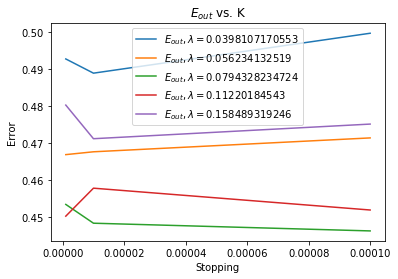

In [17]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
k = 20
es = 10**-np.linspace(4, 6, 3)
regs = 10**np.linspace(-1.4, -.8, 5)


eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for ep in es:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s, eps = %s"%(M, N, k, eta, reg, ep))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train, eps=ep)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(es, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('Stopping')
plt.ylabel('Error')
plt.legend()
plt.savefig('ein.png')
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(es, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('Stopping')
plt.ylabel('Error')
plt.legend()
plt.savefig('2eout.png')

plt.show()

In [19]:
reg = 0.08
ep = 0.00001
U,V, err = train_model(M, N, k, eta, reg, Y_train, eps=ep)

1
2.2442827224731445 0.626774787902832 3.6108672618865967
2
2.122437000274658 0.6272861957550049 3.656010150909424
3
2.2330403327941895 0.6709005832672119 3.7589309215545654
4
2.044872999191284 0.6719040870666504 3.6448581218719482
5
2.1707847118377686 0.6309986114501953 3.581491231918335
6
2.126068592071533 0.6293473243713379 3.6840202808380127
7
2.252174139022827 0.6257925033569336 3.656589984893799
8
2.1421265602111816 0.6642715930938721 3.6431219577789307
9
2.433695077896118 0.6874079704284668 4.001833438873291
10
2.404590129852295 0.6554350852966309 3.9516189098358154
11
2.2662129402160645 0.6684417724609375 3.827867031097412
12
2.140052080154419 0.6400644779205322 3.665194034576416
13
2.1552236080169678 0.6299188137054443 3.542171001434326
14
2.2478713989257812 0.6738667488098145 3.717381238937378
15
2.0923807621002197 0.6530611515045166 3.5795466899871826
16
2.2179393768310547 0.6462867259979248 3.5808229446411133
17
2.063019275665283 0.619922399520874 3.570876121520996
18
2.167

In [157]:
def generate_proj(V_t):
    '''
    Finds the 2D projection of the "V" matrix.
    
    Inputs:
        V_t: the transpose of the V matrix
        
    Outputs:
        The 2D projection of the "V" matrix.
    '''
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_std=False)
    V_t_scale = scaler.fit_transform(V_t)
    V_s = V_t_scale.T
    A, S, B = np.linalg.svd(V_s)   
    A_12 = A[:,:2]
    
    return np.dot(A_12.T, V_s)

In [158]:
proj1 = generate_proj(V)
np.sum(proj-proj1)

2.5579538487363607e-13

In [186]:
import pandas as pd

data = np.loadtxt('data/data.txt', dtype=int)
movies = pd.read_csv('data/movies.csv', sep=',', encoding='latin1')

get_avg_rating(movies, data)

# Get ids of 10 most rated movies
movie_id_sorted = np.bincount(data[:,0])[::-1]
top_10_number_ids = movie_id_sorted[:10]

# Get ids of 10 most highly rated movies
top_10_ratings_ids = (movies.sort_values('Avg', ascending=False)[:10]['Movie Id'])


def get_genre_ids(movies_df, genre, n=-1):
    '''Gets the first n movie ids of the given genre
    
    Inputs:
        movies_df: pandas dataframe with movie informations, including
        title, average rating, and genre information.
        
        genre: the genre to retrieve the ids for
        
        n: the number of ids to retrieve
        
    Output:
        a numpy array of integers corresponding to the id of the movies
    '''
    return movies_df[movies_df[genre]==1]['Movie Id'][:n]


def plot_proj(proj, movies_df, movie_ids, id_label=None, label_pts=True, suppress=False, box_color='yellow', size=(10, 10)):
    '''
    Plots the movies given by the ids on the 2D projection
    
    Inputs:
        proj: the 2D projection of the factorized "V" matrix. 
        
        movies_df: pandas dataframe with movie informations, including
        title, average rating, and genre information.
        
        movie_ids: numpy array of integers corresponding to the movies to plot.
        
        id_label: the label of the points in the legend. Relevant for multiple 
        datasets. (default = None)
        
        label_pts: boolean of whether to label plotted point with movie titles
        (default = True)
        
        suppress: boolean of whether to initialize and display the plot. To 
        plot multiple plots on the same figure, let suppress=True. (default = False)
        
        box_color: color of shading of the labels (default = yellow)
        
        size: size of the plot
        
    Outputs:
        None.
    '''
    if suppress == False:
        plt.figure(figsize=size)
    
    mask = np.zeros(len(proj[0]), dtype=bool)
    mask[movie_ids-1] = True
    
    x = proj[0][mask]
    y = proj[1][mask]
    
    plt.scatter(x, y, label=id_label)
    if label_pts == True:
        labels = [get_title_from_id(movies, movie_id) for movie_id in movie_ids]
        for label, x1, y1 in zip(labels, x, y):
            plt.annotate(
                label,
                xy=(x1, y1), xytext=(-5, 5),
                textcoords='offset points', ha='right', va='bottom'
                ,bbox=dict(boxstyle='round,pad=0.5', fc=box_color, alpha=0.5)
                #,arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
            )
    plt.axis('equal')
    if suppress == False:
        plt.show()
        
    



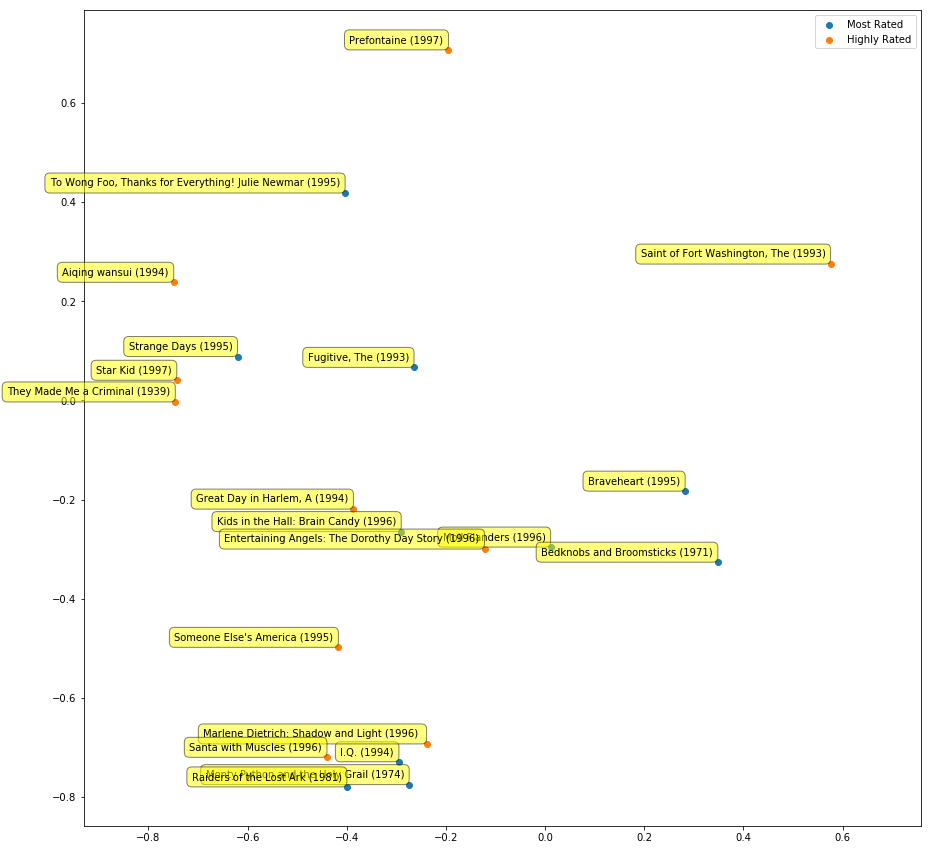

In [191]:

plt.figure(figsize=(15,15))
plot_proj(proj1, movies, top_10_number_ids, id_label='Most Rated', suppress=True)
plot_proj(proj1, movies, top_10_ratings_ids, id_label='Highly Rated', suppress=True)
plt.legend()
plt.show()

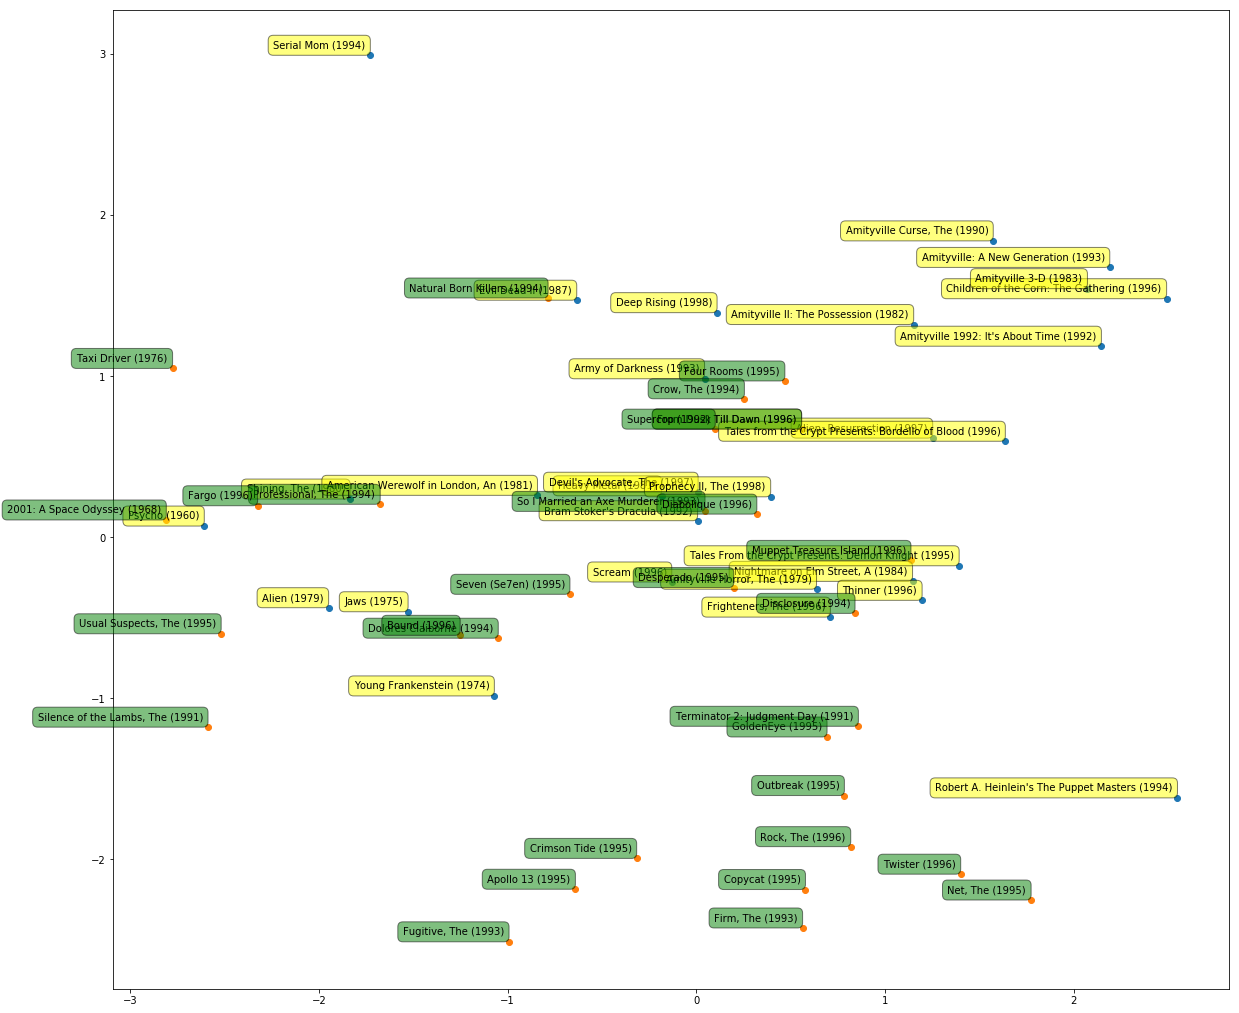

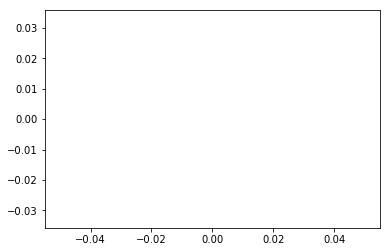

In [151]:
from proj2_helpers import *
plt.figure(figsize=(20,18))

action_ids = movies[movies['Horror']==1]['Movie Id'][:30]

mask1 = np.zeros(len(proj[0]), dtype=bool)
mask1[action_ids-1] = True
x,y = proj[0][mask1], proj[1][mask1]

plt.scatter(x,y)


labels = [get_title_from_id(movies, movie_id) for movie_id in action_ids ]
for label, x1, y1 in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x1, y1), xytext=(-5, 5),
        textcoords='offset points', ha='right', va='bottom'
        ,bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
        #,arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
    
romance_ids = movies[movies['Thriller']==1]['Movie Id'][:30]

mask1 = np.zeros(len(proj[0]), dtype=bool)
mask1[romance_ids-1] = True
x,y = proj[0][mask1], proj[1][mask1]
plt.scatter(x,y)

labels = [get_title_from_id(movies, movie_id) for movie_id in romance_ids ]
for label, x1, y1 in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x1, y1), xytext=(-5, 5),
        textcoords='offset points', ha='right', va='bottom'
        ,bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5)
        #,arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
    


plt.show()
plt.axis('equal')
plt.show()